In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as scio

%load_ext autoreload
%autoreload 2
import main

In [2]:
mat = scio.loadmat('ex8data1.mat')

x = pd.DataFrame(mat['X'])
xval = pd.DataFrame(mat['Xval'])
yval = pd.DataFrame(mat['yval']).iloc[:, 0]

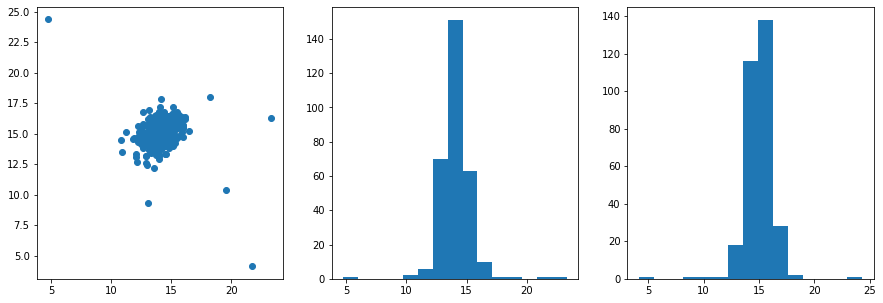

In [3]:
_, subplots = plt.subplots(1, 3, figsize=(15, 5))

subplots[0].scatter(x.iloc[:, 0], x.iloc[:, 1])
subplots[1].hist(x.iloc[:, 0], bins=15)
subplots[2].hist(x.iloc[:, 1], bins=15)

plt.show()

In [4]:
mean, variance = main.gaussian_params(x)
print('Mean', mean)
print('Variance', variance)

Mean [14.15834417 15.04672263]
Variance [1.83475832 1.71214752]


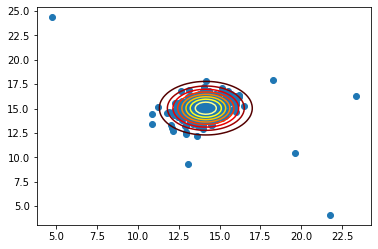

In [5]:
xx1, xx2 = np.meshgrid(
    np.linspace(x.iloc[:, 0].min(), x.iloc[:, 0].max(), 100),
    np.linspace(x.iloc[:, 1].min(), x.iloc[:, 1].max(), 100),
)

samples = np.c_[xx1.ravel(), xx2.ravel()]
predictions = main.probability(samples, mean, variance).reshape(xx1.shape)

plt.scatter(x.iloc[:, 0], x.iloc[:, 1])
plt.contour(xx1, xx2, predictions, cmap='hot', levels=9)
plt.show()

In [8]:
e_range = np.logspace(-30, -0.1, 100)
e = main.choose_threshold(xval, mean, variance, yval, e_range)
print('Best epsilon:', e)

val_prediction = main.predict(xval, mean, variance, e)
print('Precision:', main.precision(val_prediction, yval))
print('Recall:', main.recall(val_prediction, yval))
print('F1 score:', main.f1_score(val_prediction, yval))

Best epsilon: 2.3425936930163892e-05
Precision: 1.0
Recall: 0.7777777777777778
F1 score: 0.8750000000000001


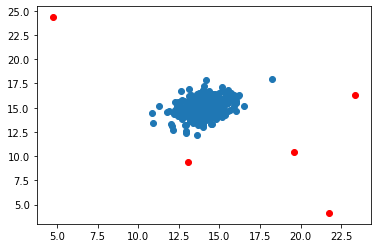

In [9]:
prediction = main.predict(x, mean, variance, e)

normal = x[prediction == 0]
anomalies = x[prediction == 1]

plt.scatter(normal.iloc[:, 0], normal.iloc[:, 1])
plt.scatter(anomalies.iloc[:, 0], anomalies.iloc[:, 1], color='red')
plt.show()